<a href="https://colab.research.google.com/github/aminmohebbi11/mcmedhacks_2022/blob/main/Week1-3%2C%20Assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Introduction to image processing assignment

# importing the required libraries

In [107]:
!pip install pydicom
import pydicom
import numpy as np 
import glob 
import os
import matplotlib.pyplot as plt
import json 
from ipywidgets import interact, interactive
from typing import List, Tuple, Union

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# downloading the data
#### In this section we are going to download a public dataset and unzip it for later usage. 

In [109]:
! wget --no-check-certificate https://data.idoimaging.com/dicom/1010_brain_mr/1010_brain_mr_04_lee.zip
! unzip 1010_brain_mr_04_lee.zip

--2022-07-29 20:39:32--  https://data.idoimaging.com/dicom/1010_brain_mr/1010_brain_mr_04_lee.zip
Resolving data.idoimaging.com (data.idoimaging.com)... 65.8.178.88, 65.8.178.38, 65.8.178.25, ...
Connecting to data.idoimaging.com (data.idoimaging.com)|65.8.178.88|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 2212367 (2.1M) [application/zip]
Saving to: ‘1010_brain_mr_04_lee.zip.3’

1010_brain_mr_04_le 100%[===================>]   2.11M  12.6MB/s    in 0.2s    

2022-07-29 20:39:33 (12.6 MB/s) - ‘1010_brain_mr_04_lee.zip.3’ saved [2212367/2212367]

Archive:  1010_brain_mr_04_lee.zip
replace 1010_brain_mr_04_lee/img_000.dcm? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 1010_brain_mr_04_lee/img_000.dcm  
  inflating: 1010_brain_mr_04_lee/img_001.dcm  
  inflating: 1010_brain_mr_04_lee/img_002.dcm  
  inflating: 1010_brain_mr_04_lee/img_003.dcm  
  inflating: 1010_brain_mr_04_lee/img_004.dcm  
  inflating: 1010_brain_mr_0

In [110]:
dir_path = '1010_brain_mr_04_lee'

# Excercise 1: Read Dicom files from a directory. 
For this question, you need to read all the `.dcm` files inside the provided directory slice by slice, and return the loaded slices in a format of a single `Numpy List` variable. 

* Define a function for reading the DICOM files and sort them based on their `instance numbers`
* Access the patient ID from the dicom object using the following ways and print them: 
  - indexing 
  - attributes (tags)

In [111]:
# solution
def load_dicom_slices(dir_path: str, force: bool=False):
  """ Load and sort a series of dicom files inside the provided folder path. 
  """
  slices = [
            pydicom.dcmread(pth ,  force=False)
            for pth in sorted(glob.glob(os.path.join(dir_path, '*.dcm')))
  ]
  slices.sort(key=lambda sli: int(sli.InstanceNumber))
  return slices

slices = load_dicom_slices(dir_path)
print("Number of slices: ", len(slices))
print('Slices dtype: ', type(slices[0]))

Number of slices:  32
Slices dtype:  <class 'pydicom.dataset.FileDataset'>


In [112]:
# Viewing slices shape. 
print("Volume Shape (Row, Column): ", slices[0].Rows, slices[0].Rows)

Volume Shape (Row, Column):  256 256


In [113]:
# interactive slides for viewing dicom slides
plt.figure(1, figsize=(10, 10))
def dicom_animation(x):
    plt.imshow(slices[x].pixel_array, cmap=plt.cm.bone)
    plt.colorbar()
    return x

interact(dicom_animation, x=(0, len(slices)-1))

<Figure size 720x720 with 0 Axes>

interactive(children=(IntSlider(value=15, description='x', max=31), Output()), _dom_classes=('widget-interact'…

<function __main__.dicom_animation>

In [114]:
# Accessing the patient id. 
print(f'the tatient value is: {slices[0].values}')

the tatient value is: <bound method Dataset.values of Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 222
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.1647423216.1757746261.1397511827184.202.0
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
(0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
(0002, 0016) Source Application Entity Title     AE: 'DicomBrowser'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND']
(0008, 0012) Instance Creation Date              DA: '20080801'
(0008, 0013) Instance Creation Time              TM: '002858.434'
(0008, 0016) SOP Class UID

In [115]:
print(f'the tatient ID is: {slices[0].PatientID}')
print(f'the patient ID is: {slices[0][0x0010,0x0020].value}')

the tatient ID is: 1010
the patient ID is: 1010


# Exercise 2: 
#### For this exercise you need to implement four function and try applying them on the loaded slices. 
* Define a function named `to_hu` for transforming the slices into Hounsfield scale. 
* Define a function named `window_clip` for cliping the pixel intensity range of each slice using a single center and windows width. Defined window describes your interested intensity range. 
* Define a function named `to_3d_numpy` to convert all the slices into a single Numpy ndarray image. This function is able to change the datatype of the output image if the user likes to change the new image datatype. 
* Define a function named `min_max_scaler` to scale a Numpy array into range `0` and `1` for easier visualization with matplotlib. This function is able to change the datatype (optional dtype by user) of the output image to `float`. 



In [116]:
def to_hu(slices: List):
    """Transform a list of slices to a Hounsfield Unit Scale. 
    This function takes the loaded slices and return a list of transformed Numpy array format slices. 
    """
    hu_slices = []
    intercept = slices[0].RescaleIntercept if 'RescaleIntercept' in slices[0] else 0
    slope = slices[0].RescaleSlope if 'RescaleSlope' in slices[0] else 1
    for sli in slices: 
        image = sli.pixel_array
        image = image * slope + intercept
        hu_slices.append(image)
    return hu_slices

def window_clip(slices: List, window_cent: int, window_width: int):
    """Clip a list of slices pixels, one by one, into a specific intensity range based on the provided window location and size.
    All the pixels inside each single slice with a intensity below and over the window range will be clipped into the min and max intensity range window covers. 
    This function returns a list of clipped Numpy array slices. 
    """
    min_val = window_cent - window_width // 2
    max_val = window_cent + window_width // 2
    cliped_slices = []
    for sli in slices: 
        image = sli.copy()
        image[image < min_val] = min_val
        image[image >max_val] = max_val
        cliped_slices.append(image)
    return cliped_slices

def to_3d_numpy(slices: List, dtype=None): 
    """Stack up all slices into a single NumPy array of the provided data type.
    """
    image = np.stack(slices)
    if dtype is not None:
      image = image.astype(dtype)
    return image

def min_max_scaler(image: np.ndarray, dtype: Union[type, None]=None): 
    """Scale a single Numpy array image intensity into range `0` and `1`
    """
    image = (image - image.min())/ (image.min() - image.max())
    if dtype is not None:
      image = image.astype(dtype)
    return image

def visualizer(slice: np.ndarray, title= ''): 
    """Visualize a slice of type numpy array with the provided title."""
    plt.imshow(slice, cmap=plt.cm.bone)
    plt.title(title)
    plt.show()

Numpy array image shape is:  (32, 256, 216)
Transformed image pixel value range (min, max):  (0, 1000)
Scaled image pixel value range (min, max):  (0.0, 0.015495228)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in ushort_scalars


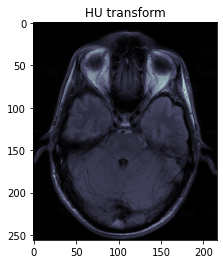

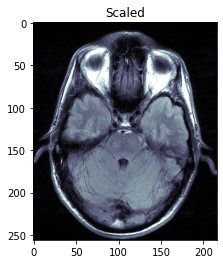

In [117]:
processed_slices_hu = to_hu(slices)
processed_slices_cliped = window_clip(processed_slices_hu, 500, 1000) # Extracting soft tissues. 
image = to_3d_numpy(processed_slices_cliped, dtype=None)

print('Numpy array image shape is: ', image.shape)
print('Transformed image pixel value range (min, max): ', (image.min(), image.max()))

scaled_image = min_max_scaler(image, dtype=np.float32)
print('Scaled image pixel value range (min, max): ', (scaled_image.min(), scaled_image.max()))

# You can see the scaled version of your slected region using the `window_clip` function here.
visualizer(processed_slices_hu[10], 'HU transform')
visualizer(scaled_image[10], 'Scaled')

# Exercise 3: Saving the data in numpy format
* Convert original frames into a numpy image array without any preprocessing, and save it as a single `.npy` file named `original_numpy_version.npy`. Keeping the original slices as a 3d numpy sample in case we needed it in the future.
* Create an ouput folder named `scaled_slices` and save all the scaled slices one by one into the folder. Assign a unique name to each slice while you are keeping the original order. 

In [118]:
slices

[Dataset.file_meta -------------------------------
 (0002, 0000) File Meta Information Group Length  UL: 222
 (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
 (0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
 (0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.1647423216.1757746261.1397511827184.202.0
 (0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
 (0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
 (0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
 (0002, 0016) Source Application Entity Title     AE: 'DicomBrowser'
 -------------------------------------------------
 (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND']
 (0008, 0012) Instance Creation Date              DA: '20080801'
 (0008, 0013) Instance Creation Time              TM: '002858.434'
 (0008, 0016) SOP Class UID                       UI: MR Image Stor

In [119]:
# Convert the original slices into a 3d nmpy array and save it as a .npy file format. 
# Your code here. 
#for sli in slices:
  #pixel1 = sli.pixel_array
 # original_image = to_3d_numpy([pixel1] , dtype=None)
#np.save('original_numpy_version.npy', original_image)

original_image = to_3d_numpy([sli.pixel_array for sli in slices], dtype=np.uint16 )
np.save('original_numpy_version.npy', original_image)

In [120]:
# Create a folder and save the scaled slices one by one. 
# Your code here. 
os.makedirs('scaled_slices' , exist_ok= True)
for i ,sli in enumerate(scaled_image):
  np.save(f'scaled_slices/slice{i}.npy', sli)



# Exercise 4: Save the processed numpy data as a series of DICOM files
#### In this section, you need to save the scaled version image of the loaded dicom slices into a series of dicom files inside a directory named `scaled_slices_dicom`, be splitting the image into a sequence of slices in the original order.  
To do so, you need to create a new dicom dataset for each slide, import the original dicom information into the new created dataset, and save it with a unique name inside the mentioned directory.

In [121]:
from pydicom.dataset import Dataset, FileDataset
from pydicom.uid import ExplicitVRLittleEndian
import pydicom._storage_sopclass_uids

os.makedirs('scaled_slices_dicom', exist_ok=True)

for i, (sli_img, sli) in enumerate(zip(processed_slices_cliped, slices)):
    # Your code here.
  new_ds =  Dataset()
  for elem in sli :
      if elem.name == 'Pixel Data' :
      #TODO crop an image array and create new data element
        data_element = pydicom.DataElement(tag=elem.tag, VR='OW', value=sli_img.tobytes('C'))
        new_ds.add(data_element)
      else : 
        new_ds.add(elem)

  new_ds.Rows = sli_img.shape[0]
  new_ds.Columns = sli_img.shape[1]
  new_ds.is_little_endian = True
  new_ds.is_implicit_VR = False
  new_ds.file_meta = pydicom.dataset.FileMetaDataset()
  new_ds.file_meta.TransferSyntaxUID = pydicom.uid.ExplicitVRLittleEndian  

  new_ds.RescaleIntercept = '0'
  new_ds.RescaleSlope = '1'

  new_ds.save_as('scaled_slices_dicom' + str(i) + '.dcm')
#write_like_original=False
new_ds


Dataset.file_meta -------------------------------
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND']
(0008, 0012) Instance Creation Date              DA: '20080801'
(0008, 0013) Instance Creation Time              TM: '003034.291'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.5962.99.1.1647423216.1757746261.1397511827184.234.0
(0008, 0020) Study Date                          DA: '20080801'
(0008, 0021) Series Date                         DA: '20080801'
(0008, 0022) Acquisition Date                    DA: '20080801'
(0008, 0023) Content Date                        DA: '20080801'
(0008, 0030) Study Time                          TM: '000000.000'
(0008, 0031) Series Time                         TM: '002858.419'
(0008, 0032) Acquisition Tim

In [126]:
new_slices = load_dicom_slices('scaled_slices_dicom',force = True)
print('the number of sclice is:', len(new_slices))
print(f'The type od new slices is {type(new_slices)}')


the number of sclice is: 0
The type od new slices is <class 'list'>
